In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mplot as mp
import matplotlib.gridspec as gridspec
import os
import matplotlib

Below is the plotting code for the repeat chronic ART order 9 simulations:

In [2]:
xdat_list = []
ydat_list = []

cm2inch = lambda x: x/2.54
SINGLE_COLUMN   = cm2inch(8.8)
ONE_FIVE_COLUMN = cm2inch(11.4)
DOUBLE_COLUMN   = cm2inch(18.0)
SLIDE_WIDTH     = 10.5

In [3]:
ORDER_FULLSIM = 9
for i in range(1,4):
    directory = "../output/final_runs/full_ord9/Run"+str(i)
    for filename in os.listdir(directory):
        if "totals" in filename:
            df_totals_fullsim = pd.read_csv(directory + "/" + filename, memory_map=True, index_col= False)

            t_fullsim         = np.array(df_totals_fullsim['t'])
            Ltotal_fullsim    = np.array(df_totals_fullsim['Ltotal'])
            LXRtotal_fullsim  = np.array(df_totals_fullsim['LXRtotal'])
            Atotal_fullsim    = np.array(df_totals_fullsim['Atotal'])
            ViralLoad_fullsim = (Atotal_fullsim*(10**(11-ORDER_FULLSIM)))/1680
    
            MONTHSART_FULLSIM = 60
            ORDER_FULLSIM = 9
            xdat = [(t_fullsim-MONTHSART_FULLSIM)/12]
            ydat = [LXRtotal_fullsim/(1.75*(10**(ORDER_FULLSIM-6)))]

            xdat_list.append(xdat)
            ydat_list.append(ydat)
    yint = 0.5*(10**(ORDER_FULLSIM-6))

    Decay44 = yint*np.exp(-(np.divide(t_fullsim,44/np.log(2))))
    Decay57 = yint*0.1*np.exp(-(np.divide(t_fullsim,57/np.log(2))))
    Decay31 = yint*0.7*np.exp(-(np.divide(t_fullsim,31/np.log(2))))

In [4]:
xdat_list_IUPM = xdat_list
ydat_list_IUPM = ydat_list

In [7]:
xdat_list = []
ydat_list = []
for i in range(1,4):
    directory = "../output/final_runs/full_ord9/Run"+str(i)
    for filename in os.listdir(directory):
        if "totals" in filename:
            df_totals_fullsim = pd.read_csv(directory + "/" + filename, memory_map=True, index_col= False)

            t_fullsim         = np.array(df_totals_fullsim['t'])
            Ltotal_fullsim    = np.array(df_totals_fullsim['Ltotal'])
            LXRtotal_fullsim  = np.array(df_totals_fullsim['LXRtotal'])
            Atotal_fullsim    = np.array(df_totals_fullsim['Atotal'])
            ViralLoad_fullsim = (Atotal_fullsim*(10**(11-ORDER_FULLSIM)))/1680
    
            MONTHSART_FULLSIM = 60
            ORDER_FULLSIM = 9
            xdat = [(t_fullsim-MONTHSART_FULLSIM)*30]

            ydat = [Ltotal_fullsim/(1.75*(10**(ORDER_FULLSIM-6)))]
            xdat_list.append(xdat)
            ydat_list.append(ydat)

In [8]:
VAR_COLORS = sns.husl_palette(8)
C_RNA      = VAR_COLORS[0]
C_DNA      = VAR_COLORS[1]

In [9]:
xdat_list_DNA = xdat_list
ydat_list_DNA = ydat_list
Decay99d = 2.7*(10**(ORDER_FULLSIM-3))*np.exp(-(np.divide(t_fullsim-MONTHSART_FULLSIM-0.47,(99/30)/np.log(2))))
Decay133d = 2.7*(10**(ORDER_FULLSIM-3))*np.exp(-(np.divide(t_fullsim-MONTHSART_FULLSIM-0.47,(133/30)/np.log(2))))

In [10]:
index = 0
for item in range(0,len(list(xdat[0]))):
    if list(xdat[0])[item]>=14:
        index = item
        break

In [12]:
xdat_list = []
ydat_list = []
for i in range(1,4):
    directory = "../output/final_runs/full_ord9/Run"+str(i)
    for filename in os.listdir(directory):
        if "totals" in filename:
            df_totals_fullsim = pd.read_csv(directory + "/" + filename, memory_map=True, index_col= False)

            t_fullsim         = np.array(df_totals_fullsim['t'])
            Ltotal_fullsim    = np.array(df_totals_fullsim['Ltotal'])
            LXRtotal_fullsim  = np.array(df_totals_fullsim['LXRtotal'])
            Atotal_fullsim    = np.array(df_totals_fullsim['Atotal'])
            ViralLoad_fullsim = (Atotal_fullsim*(10**(11-ORDER_FULLSIM)))/1680
    
            MONTHSART_FULLSIM = 60
            ORDER_FULLSIM = 9
            xdat = [(t_fullsim-MONTHSART_FULLSIM)*30]
            ydat = [ViralLoad_fullsim]
            xdat_list.append(xdat)
            ydat_list.append(ydat)

In [13]:
xdat_list_RNA = xdat_list
ydat_list_RNA = ydat_list

In [14]:
MONTHSART_FULLSIM = 60

idx, = np.where((t_fullsim > MONTHSART_FULLSIM-0.009) & (t_fullsim < MONTHSART_FULLSIM+0.009))
idx = int(idx)
timeMin = [0,10.0]
wei1 = 1.0
wei2 = 1.0
init = ViralLoad_fullsim[idx]
vl1 = np.array([init*wei1,  wei1*init*np.exp(-((float(timeMin[1])-float(timeMin[0]))/(1/np.log(2))))])  #1day half life
vl2 = np.array([init*wei2, wei2*init*np.exp(-((timeMin[1]-timeMin[0])/(2/np.log(2))))])   #2day half life
timeMax = [15, 45]
init = ViralLoad_fullsim[idx+50]
wei3 = 1.0
wei4 = 1.0
vl3 = np.array([init*wei3,  wei3*init*np.exp(-(30/(8/np.log(2))))])  #7.8day half life
vl4 = np.array([init*wei4, wei4*init*np.exp(-(30/(28/np.log(2))))]) #27.2day half life

/tmp/ipykernel_2821623/3213728047.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  idx = int(idx)


In [15]:
xdat_list_RNA = xdat_list
ydat_list_RNA = ydat_list

In [16]:
def clean_axes(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

In [17]:
cm2inch = lambda x: x/2.54
SINGLE_COLUMN   = cm2inch(8.8)
w     = SINGLE_COLUMN
goldh = w / 1.1
fig   = plt.figure(figsize=(w, goldh))

<Figure size 346.457x314.961 with 0 Axes>

In [18]:
VAR_COLORS = sns.husl_palette(8)
C_RNA      = VAR_COLORS[0]
C_DNA      = VAR_COLORS[1]
C_IUPM     = VAR_COLORS[2]
C_MUT      = VAR_COLORS[4]
C_CLONE    = VAR_COLORS[5]
C_EPSILON  = VAR_COLORS[5]
C_D614G    = VAR_COLORS[6]
C_A222V    = VAR_COLORS[7]

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Ari

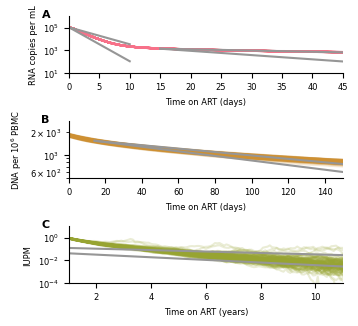

In [19]:
matplotlib.rcParams['font.family'] = 'Arial'
matplotlib.rcParams['font.size'] = 6
matplotlib.rcParams['axes.labelsize'] = 6
matplotlib.rcParams['xtick.labelsize'] = 6
matplotlib.rcParams['ytick.labelsize'] = 6
matplotlib.rcParams['legend.fontsize'] = 6

fig, axs = plt.subplots(3, 1, figsize=(w,goldh), sharex=False, constrained_layout=True)

for i in range(0,100):
    axs[0].plot(list(xdat_list_RNA[i][0]),list(ydat_list_RNA[i][0]), color = C_RNA, alpha = 0.2)
axs[0].plot(timeMin, vl1, color='#969696', label='Constraints from clinical data', alpha=1)
axs[0].plot(timeMin, vl2, color='#969696', alpha=1)
axs[0].plot(timeMax, vl3, color='#969696', alpha=1)
axs[0].plot(timeMax, vl4, color='#969696', alpha=1)
axs[0].set_yscale("log")
axs[0].set_xlabel("Time on ART (days)")
axs[0].set_ylabel("RNA copies per mL")
axs[0].set_xlim(0,45)
axs[0].set_ylim(1e1, 1e6)
axs[0].text(-0.1,0.98, 'A', transform=axs[0].transAxes, fontweight = 'bold', fontname = 'Arial', fontsize = 8)
clean_axes(axs[0])

for i in range(0,100):
    axs[1].plot(list(xdat_list_DNA[i][0]),list(ydat_list_DNA[i][0]), color = C_DNA, alpha = 0.2)
axs[1].plot((t_fullsim-MONTHSART_FULLSIM)[index:]*30, (Decay99d/(1.75*(10**(ORDER_FULLSIM-6))))[index:], color='#969696', alpha=1)
axs[1].plot((t_fullsim-MONTHSART_FULLSIM)[index:]*30, (Decay133d/(1.75*(10**(ORDER_FULLSIM-6))))[index:], color='#969696', alpha=1)
axs[1].set_yscale("log")
axs[1].set_xlabel("Time on ART (days)")
axs[1].set_ylabel("DNA per " + r'$10^6$' + " PBMC")
axs[1].set_xlim(0,150)
axs[1].set_ylim(0.5e3, 2.8e3)
axs[1].text(-0.1,0.98, 'B', transform=axs[1].transAxes, fontweight = 'bold', fontname = 'Arial', fontsize = 8)
clean_axes(axs[1])

for i in range(0,100):
    axs[2].plot(list(xdat_list_IUPM[i][0]),list(ydat_list_IUPM[i][0]), color = C_IUPM, alpha = 0.2)
axs[2].plot((t_fullsim-MONTHSART_FULLSIM)/12, 10*Decay57/(1.75*(10**(ORDER_FULLSIM-6))), color='#969696', alpha=1)
axs[2].plot((t_fullsim-MONTHSART_FULLSIM)/12, Decay31/(1.75*(10**(ORDER_FULLSIM-6))), color = '#969696', alpha=1)
axs[2].set_yscale("log")
axs[2].set_xlim(1,11)
axs[2].set_ylim(10**(-4),10**1)
axs[2].set_xlabel("Time on ART (years)")
axs[2].set_ylabel("IUPM")
axs[2].text(-0.1,0.98, 'C', transform=axs[2].transAxes, fontweight = 'bold', fontname = 'Arial', fontsize = 8)
clean_axes(axs[2])

# plt.legend()
# plt.savefig("../figures/for_paper/fig3_repeat_simulations_kinetics.pdf")
# plt.savefig("../figures/for_paper/fig3_repeat_simulations_kinetics.png", dpi=300)